Image in greyscale

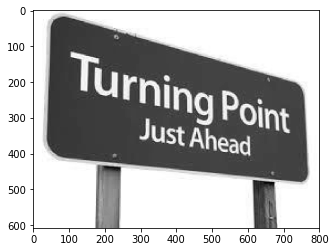

In [375]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy

# imgName = 'imgs/img_883.jpg' # Quadrado - please be safe.
# imgName = 'imgs/img_1031.jpg' # Quadrado + redondo - danger, dinosaur area
# imgName = 'imgs/img_1001.jpg' # OK
# imgName = 'imgs/img_1020.jpg'
# imgName = 'imgs/img_1099.jpg'
# imgName = 'imgs/img_1015.jpg'
# imgName = 'imgs/163_icdar13.png'
# imgName = 'imgs/img_899.jpg'
imgName = 'imgs/img_1162.jpg'
# imgName = 'imgs/img_955.jpg'
# imgName = 'imgs/img_1163.jpg'

regularImg = cv2.imread(imgName)
img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE);
plt.imshow(img, cmap=plt.cm.gray);

Image blurred

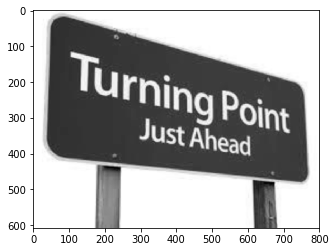

In [376]:
img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img, cmap=plt.cm.gray);

Image binarized

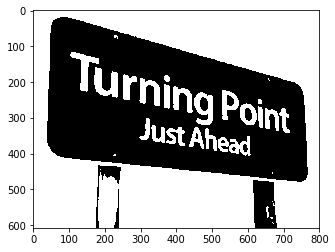

In [377]:
# ret, threshImg = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
# ret, threshImg = cv2.threshold(img, 200, 255, 0)
ret, threshImg = cv2.threshold(img, 127, 255, 0)
plt.imshow(threshImg, cmap=plt.cm.gray);

Detecção da placa

38
335675
[[[ 56  29]]

 [[ 94  18]]

 [[732 202]]

 [[756 245]]

 [[762 469]]

 [[745 480]]

 [[ 68 406]]

 [[ 38 364]]]


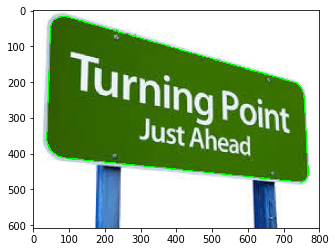

In [383]:
contours, hierarchy = cv2.findContours(threshImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
maxArea = 0
regularImg = cv2.imread(imgName)

for c in contours:
    perimeter = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.005 * perimeter, True)
    (x, y, w, h) = cv2.boundingRect(approx)
    
    if len(approx) < 10 and w*h > maxArea:
        largestC = c
        maxArea = w*h
        largestCApprox = approx
        
cv2.drawContours(regularImg, [largestC], -1, (0, 255, 0), 2);
# print(largestC)
print(maxArea)
print(largestCApprox)

plt.imshow(regularImg, cmap='gray');

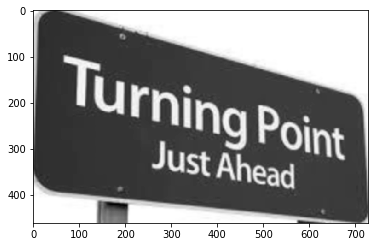

In [384]:
# print(approxLargestC)
# print(np.max(approxLargestC, axis=1))

maxX = maxY = 0
minX = minY = np.max(img)
for c in largestC:
    c = c[0]
#     print(c)
    if c[0] > maxX:
        maxX = c[0]
    elif c[0] < minX:
        minX = c[0]
    
    if c[1] > maxY:
        maxY = c[1]
    elif c[1] < minY:
        minY = c[1]
    
crop_img = img[minY:maxY, minX:maxX]
plt.imshow(crop_img, cmap='gray');

Histograma da imagem

165.83073190789474
255.0


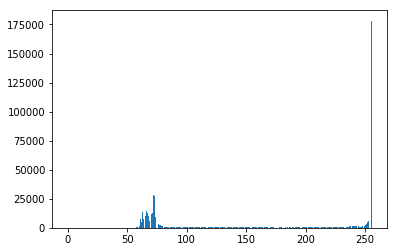

In [385]:
def histogram(A, no_levels):
    # gets the size of the input matrix
    N, M = A.shape
    # creates an empty histogram with size proportional to the number of graylevels 
    hist = np.zeros(no_levels).astype(int)

    # computes for all levels in the range
    for i in range(no_levels):
        # the np.where() function returns the indices for all coordinates 
        # in some array matching the condition. In this case, all pixels
        # that have value 'i'
        pixels_value_i = np.where(A == i)
        
        #print(pixels_value_i)  # uncomment to print array of coordinates
        
        # by counting how many coordinates the np.where function returned, 
        # we can assign it at the respective histogram bin
        # this is done by getting the size of the vector of coordinates
        hist[i] = pixels_value_i[0].shape[0]
            
    return(hist)

hist = histogram(img, 256);
plt.bar(range(256), hist);
print(np.mean(img))
print(np.percentile(img, 99))